## Tokenizing
By tokenizing, you can conveniently split up text by word or by sentence. This will allow you to work with smaller pieces of text that are still relatively coherent and meaningful even outside of the context of the rest of the text. It’s your first step in turning unstructured data into structured data, which is easier to analyze.

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

### Tokenizing by word
### Tokenizing by sentence



Now that you’ve imported what you need, you can create a string to tokenize
Here’s a quote from Dune that you can use

In [3]:
example = '''Muad'Dib learned rapidly because his first training was in how to learn.
            And the first lesson of all was the basic trust that he could learn.
            It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult.'''

You can use sent_tokenize() to split up example_string into sentences

In [4]:
sent_tokenize(example)

["Muad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn, and how many more believe learning to be difficult."]

Now try tokenizing example_string by word:

In [5]:
word_tokenize(example)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

See how "It's" was split at the apostrophe to give you 'It' and "'s", but "Muad'Dib" was left whole? 
This happened because NLTK knows that 'It' and "'s" (a contraction of “is”) are two distinct words, 
so it counted them separately. 
But "Muad'Dib" isn’t an accepted contraction like "It's", so it wasn’t read as two separate words and was left intact.

## Filtering Stop words

Stop words are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves.

In [6]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [8]:
words_in_quote = word_tokenize(worf_quote)
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [9]:
# create a set of stop words to filter words_in_quote

stop_words = set(stopwords.words("english"))

# Next, create an empty list to hold the words that make it past the filter

filtered_list = []
for word in words_in_quote:
    if word.casefold() not in stop_words:
        filtered_list.append(word)

* You iterated over words_in_quote with a for loop and added all the words that weren’t stop words to filtered_list. 
* You used .casefold() on word so you could ignore whether the letters in word were uppercase or lowercase. 
* This is worth doing because stopwords.words('english') includes only lowercase versions of stop words

In [10]:
filtered_list = [word for word in words_in_quote if word.casefold() not in stop_words]
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

# Normalizing Words
Normalization is a little more complex than tokenization. It entails condensing all forms of a word into a single representation of that word. For instance, “watched,” “watching,” and “watches” can all be normalized into “watch.” There are two major normalization methods:

### Stemming
### Lemmatization

## Stemming

* Stemming is a text processing task in which you reduce words to their root, which is the core part of a word.
* For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used. 
* NLTK has more than one stemmer, but you’ll be using the
### Porter stemmer.

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [12]:
string_for_stemming = '''The crew of the USS Discovery discovered many discoveries.
                        Discovering is what explorers do.'''

Before you can stem the words in that string, you need to separate all the words in it

In [13]:
words = word_tokenize(string_for_stemming)

In [14]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [15]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

## Snowball stemmer

In [16]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

In [17]:
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

## Tagging Parts of Speech

art of speech is a grammatical term that deals with the roles words play when you use them together in sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.

In English, there are eight parts of speech:

###  * Part of speech	                   Role	                                                                                           Examples
* Noun	        Is a person, place, or thing	mountain, bagel,                                      Poland
* Pronoun	        Replaces a noun	                                                                     you, she, we
* Adjective	    Gives information about what a noun is like	                                   efficient, windy, colorful
* Verb	        Is an action or a state of being	                                                  learn, is, go
* Adverb	        Gives information about a verb, an adjective, or another adverb	               efficiently, always,very
* Preposition     Gives information about how a noun or pronoun is connected to another word	        from, about, at
* Conjunction	    Connects two other words or phrases	                                               so, because, and
* Interjection    Is an exclamation	                                                                 yay, ow, wow

In [18]:
sagan_quote =  """If you wish to make an apple pie from scratch, you must first invent the universe."""

In [19]:
words_in_sagan_quote = word_tokenize(sagan_quote)

Now call nltk.pos_tag() on your new list of words:

In [20]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_in_sagan_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

All the words in the quote are now in a separate tuple, with a tag that represents their part of speech. 

But what do the tags mean? Here’s how to get a list of tags and their meanings.

In [21]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## Lemmatizing

* Now that you’re up to speed on parts of speech, you can circle back to lemmatizing. 
* Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

## Note: 
* A lemma is a word that represents a whole group of words, and that group of words is called a lexeme
* For example, if you were to look up the word “blending” in a dictionary, then you’d need to look at the entry for “blend,” but you would find “blending” listed in that entry.
* In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when you lemmatize a word, you are reducing it to its lemma.

In [22]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
lemmatizer = WordNetLemmatizer()

Let’s start with lemmatizing a plural noun:

In [24]:
lemmatizer.lemmatize("scarves")

'scarf'

"scarves" gave you 'scarf', so that’s already a bit more sophisticated than what you would have gotten with the Porter stemmer, which is 'scarv'. Next, create a string with more than one word to lemmatize:

In [25]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

Now tokenize that string by word:

In [26]:
words = word_tokenize(string_for_lemmatizing)

Create a list containing all the words in words after they’ve been lemmatized:



In [27]:
lemmantized_word = [lemmatizer.lemmatize(word) for word in words]
lemmantized_word

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

That looks right. The plurals 'friends' and 'scarves' became the singulars 'friend' and 'scarf'.

But what would happen if you lemmatized a word that looked very different from its lemma? Try lemmatizing "worst":

In [28]:
lemmatizer.lemmatize("worst")

'worst'

You got the result 'worst' because lemmatizer.lemmatize() assumed that "worst" was a noun. You can make it clear that you want "worst" to be an adjective:

In [29]:
lemmatizer.lemmatize("worst", pos="a")

'bad'

## Chunking
While tokenizing allows you to identify words and sentences, chunking allows you to identify phrases.

### Note: 
A phrase is a word or group of words that works as a single unit to perform a grammatical function. Noun phrases are built around a noun.

Here are some examples:

* “A planet”
* “A tilting planet”
* “A swiftly tilting planet”

Chunking makes use of POS tags to group words and apply chunk tags to those groups. Chunks don’t overlap, so one instance of a word can be in only one chunk at a time

In [30]:
lotr_quote = "It's a dangerous business, Frodo, going out your door."

In [31]:
words_in_lotr_quote = word_tokenize(lotr_quote)
words_in_lotr_quote

['It',
 "'s",
 'a',
 'dangerous',
 'business',
 ',',
 'Frodo',
 ',',
 'going',
 'out',
 'your',
 'door',
 '.']

In [32]:
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)
lotr_pos_tags

[('It', 'PRP'),
 ("'s", 'VBZ'),
 ('a', 'DT'),
 ('dangerous', 'JJ'),
 ('business', 'NN'),
 (',', ','),
 ('Frodo', 'NNP'),
 (',', ','),
 ('going', 'VBG'),
 ('out', 'RP'),
 ('your', 'PRP$'),
 ('door', 'NN'),
 ('.', '.')]

#### You’ve got a list of tuples of all the words in the quote, along with their POS tag. In order to chunk, you first need to define a chunk grammar.
### Note: 
A chunk grammar is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.

In [33]:
grammer = "NP: {<DT>?<JJ>*<NN>}"

NP stands for noun phrase. You can learn more about noun phrase chunking

According to the rule you created, your chunks:
* Start with an optional (?) determiner ('DT')
* Can have any number (*) of adjectives (JJ)
* End with a noun (<NN>)

Create a chunk parser with this grammar:

In [34]:
#chunk_parser = nltk.RegexpParser(grammar)

In [35]:
#tree = chunk_parser.parse(lotr_pos_tags)

In [36]:
#tree.draw()

You got two noun phrases:

* 'a dangerous business' has a determiner, an adjective, and a noun.
* 'door' has just a noun.

## Chinking
Chinking is used together with chunking, but while chunking is used to include a pattern, chinking is used to exclude a pattern

The next step is to create a grammar to determine what you want to include and exclude in your chunks. This time, you’re going to use more than one line because you’re going to have more than one rule. 
Because you’re using more than one line for the grammar, you’ll be using triple quotes ("""):

In [52]:
grammer2 = '''
chunk: {<.*>+}
       }<JJ>{'''

* The first rule of your grammar is {<.*>+}. This rule has curly braces that face inward ({}) because it’s used to determine what patterns you want to include in you chunks. In this case, you want to include everything: <.*>+.

* The second rule of your grammar is '}<JJ>{'. This rule has curly braces that face outward (}{) because it’s used to determine what patterns you want to exclude in your chunks. In this case, you want to exclude adjectives: <JJ>.

Create a chunk parser with this grammar:

In [53]:
chunk_parser = nltk.RegexpParser(grammer2)

Now chunk your sentence with the chink you specified:

In [59]:

tree1 = chunk_parser.parse(lotr_pos_tags)

In [60]:
tree1.draw()

Here, you’ve excluded the adjective 'dangerous' from your chunks and are left with two chunks containing everything else. The first chunk has all the text that appeared before the adjective that was excluded. The second chunk contains everything after the adjective that was excluded.

### Named Entity Recognition (NER)
* Named entities are noun phrases that refer to specific locations, people, organizations, and so on.
* With named entity recognition, you can find the named entities in your texts and also determine what kind of named entity they are

In [62]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
tree2 = nltk.ne_chunk(lotr_pos_tags)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [63]:
tree2.draw()

See how Frodo has been tagged as a PERSON?.

You also have the option to use the parameter binary=True if you just want to know what the named entities are but not what kind of named entity they are

In [64]:
tree3 = nltk.ne_chunk(lotr_pos_tags, binary=True)

In [65]:
tree3.draw()

### Getting Text to Analyze

Now that you’ve done some text processing tasks with small example texts, you’re ready to analyze a bunch of texts at once. A group of texts is called a corpus

In [66]:
nltk.download("book")


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\cws\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping cor

True

In [67]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## Using a Concordance

* When you use a concordance, you can see each time a word is used, along with its immediate context. 
* This can give you a peek into how a word is being used at the sentence level and what words are used with it.

In [68]:
text8.concordance("man")

Displaying 14 of 14 matches:
 to hearing from you all . ABLE young man seeks , sexy older women . Phone for 
ble relationship . GENUINE ATTRACTIVE MAN 40 y . o ., no ties , secure , 5 ft .
ship , and quality times . VIETNAMESE MAN Single , never married , financially 
ip . WELL DRESSED emotionally healthy man 37 like to meet full figured woman fo
 nth subs LIKE TO BE MISTRESS of YOUR MAN like to be treated well . Bold DTE no
eeks lady in similar position MARRIED MAN 50 , attrac . fit , seeks lady 40 - 5
eks nice girl 25 - 30 serious rship . Man 46 attractive fit , assertive , and k
 40 - 50 sought by Aussie mid 40s b / man f / ship r / ship LOVE to meet widowe
discreet times . Sth E Subs . MARRIED MAN 42yo 6ft , fit , seeks Lady for discr
woman , seeks professional , employed man , with interests in theatre , dining 
 tall and of large build seeks a good man . I am a nonsmoker , social drinker ,
lead to relationship . SEEKING HONEST MAN I am 41 y . o ., 5 ft . 4 , med . bui
 quiet time

In [69]:
text8.concordance("woman")

Displaying 11 of 11 matches:
at home . Seeking an honest , caring woman , slim or med . build , who enjoys t
thy man 37 like to meet full figured woman for relationship . 48 slim , shy , S
rry . MALE 58 years old . Is there a Woman who would like to spend 1 weekend a 
 other interests . Seeking Christian Woman for fship , view to rship . SWM 45 D
ALE 60 - burly beared seeks intimate woman for outings n / s s / d F / ston / P
ington . SCORPIO 47 seeks passionate woman for discreet intimate encounters SEX
le dad . 42 , East sub . 5 " 9 seeks woman 30 + for f / ship relationship TALL 
personal trainer looking for married woman age open for fun MARRIED Dark guy 37
rinker , seeking slim - medium build woman who is happy in life , age open . AC
. O . TERTIARY Educated professional woman , seeks professional , employed man 
 real romantic , age 50 - 65 y . o . WOMAN OF SUBSTANCE 56 , 59 kg ., 50 , fit 


## Making a Dispersion Plot

* You can use a dispersion plot to see how much a particular word appears and where it appears. 
* So far, we’ve looked for "man" and "woman", but it would be interesting to see how much those words are used compared to their synonyms:


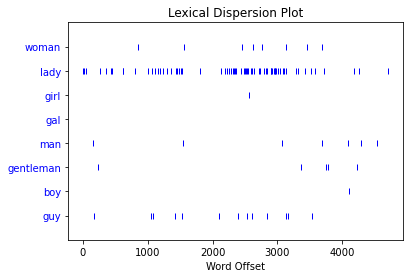

In [70]:
 text8.dispersion_plot(["woman", "lady", "girl", "gal", "man", "gentleman", "boy", "guy"])

Each vertical blue line represents one instance of a word. Each horizontal row of blue lines represents the corpus as a whole.

### USAGE
* You use a dispersion plot when you want to see where words show up in a text or corpus. 
+ If you’re analyzing a single text, this can help you see which words show up near each other. 
+ If you’re analyzing a corpus of texts that is organized chronologically, it can help you see which words were being used more or less over a period of time.

## Making a Frequency Distribution

With a frequency distribution, you can check which words show up most frequently in your text.

In [72]:
from nltk import FreqDist

In [75]:
frequency_distribution = FreqDist(text8)
print(frequency_distribution)

<FreqDist with 1108 samples and 4867 outcomes>


Since 1108 samples and 4867 outcomes is a lot of information, start by narrowing that down.

In [76]:
frequency_distribution.most_common(20)

[(',', 539),
 ('.', 353),
 ('/', 110),
 ('for', 99),
 ('and', 74),
 ('to', 74),
 ('lady', 68),
 ('-', 66),
 ('seeks', 60),
 ('a', 52),
 ('with', 44),
 ('S', 36),
 ('ship', 33),
 ('&', 30),
 ('relationship', 29),
 ('fun', 28),
 ('in', 27),
 ('slim', 27),
 ('build', 27),
 ('o', 26)]

In [88]:
frequency_distribution.tabulate(10)

           ,            .            /         lady            -        seeks         ship            & relationship          fun 
         539          353          110           68           66           60           33           30           29           28 


You have a lot of stop words in your frequency distribution, but you can remove them

In [91]:
meaningful_words = [word for word in text8 if word.casefold() not in stop_words and word.isalpha()]

Now that you have a list of all of the words in your corpus that aren’t stop words, make a frequency distribution:

In [92]:
frequency_distribution = FreqDist(meaningful_words)
print(frequency_distribution)

<FreqDist with 885 samples and 2548 outcomes>


In [93]:
frequency_distribution.most_common(20)

[('lady', 68),
 ('seeks', 60),
 ('ship', 33),
 ('relationship', 29),
 ('fun', 28),
 ('slim', 27),
 ('build', 27),
 ('smoker', 23),
 ('non', 22),
 ('movies', 22),
 ('good', 21),
 ('honest', 20),
 ('dining', 19),
 ('rship', 18),
 ('looking', 18),
 ('like', 18),
 ('age', 17),
 ('attractive', 17),
 ('friendship', 17),
 ('Looking', 16)]

In [95]:
frequency_distribution.tabulate(10)

        lady        seeks         ship relationship          fun         slim        build       smoker          non       movies 
          68           60           33           29           28           27           27           23           22           22 


You can turn this list into a graph:

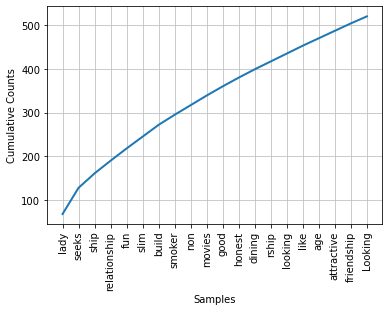

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [96]:
frequency_distribution.plot(20, cumulative=True)

## Finding Collocations

A collocation is a sequence of words that shows up often.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

* Bigrams: Frequent two-word combinations
* Trigrams: Frequent three-word combinations
* Quadgrams: Frequent four-word combinations

To see pairs of words that come up often in your corpus, you need to call .collocations() on it

In [84]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


But what would happen if you looked for collocations after lemmatizing the words in your corpus? Would you find some word combinations that you missed the first time around because they came up in slightly varied versions?

If you followed the instructions earlier, then you’ll already have a lemmatizer, but you can’t call collocations() on just any data type, so you’re going to need to do some prep work. Start by creating a list of the lemmatized versions of all the words in text8:

In [106]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in text8 if word.isalpha()]

But in order for you to be able to do the linguistic processing tasks you’ve seen so far, you need to make an NLTK text with this list:

In [107]:
new_text = nltk.Text(lemmatized_words)

In [108]:
new_text.collocations()

non smoker; social drinker; medium build; long term; quiet night;
would like; age open; med build; smoker social; easy going;
financially secure; Would like; similar interest; Age open; fun time;
fship rship; weekend away; well presented; never married; single mum


In [109]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(lemmatized_words)

In [112]:
finder.ngram_fd.most_common(10)

[(('like', 'to', 'meet'), 12),
 (('for', 'f', 'ship'), 9),
 (('would', 'like', 'to'), 8),
 (('smoker', 'social', 'drinker'), 7),
 (('S', 'S', 'D'), 7),
 (('quiet', 'night', 'at'), 6),
 (('night', 'at', 'home'), 6),
 (('non', 'smoker', 'social'), 6),
 (('Would', 'like', 'to'), 5),
 (('lady', 'for', 'friendship'), 4)]

The TrigramCollocationFinder instance will search specifically for trigrams.
+ As you may have guessed, NLTK also has the BigramCollocationFinder and QuadgramCollocationFinder classes for bigrams and quadgrams, respectively.
+ All these classes have a number of utilities to give you information about all identified collocations

In [114]:
finder.ngram_fd.tabulate(3)

 ('like', 'to', 'meet')    ('for', 'f', 'ship') ('would', 'like', 'to') 
                     12                       9                       8 
